## Data Loading

In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 1. Load Dataset 
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
# 2. Pilih 5 fitur dan target 
features = ["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup"]
df = df[features + ["MedHouseVal"]]

df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422


### Kolom Fitur: Definisi
Berikut penjelasan kelima fitur yang akan kita gunakan:

- MedInc – Median income per household dalam block group (dalam satuan puluhan ribu dolar) 

- HouseAge – Median usia bangunan (tahun) dalam block group 

- AveRooms – Rata-rata jumlah ruangan per rumah tangga 

- Population – Total populasi dalam block group 

- AveOccup – Rata-rata jumlah anggota rumah tangga (populasi ÷ jumlah household) 

### Target: MedHouseVal
- MedHouseVal – Median house value untuk setiap block group, dalam satuan $100.000

In [43]:
# 3. Display summary statistics 
print("Summary Statistics")
df.describe()


Summary Statistics


,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,5.000010


In [44]:
df.shape

(20640, 6)

#### notes

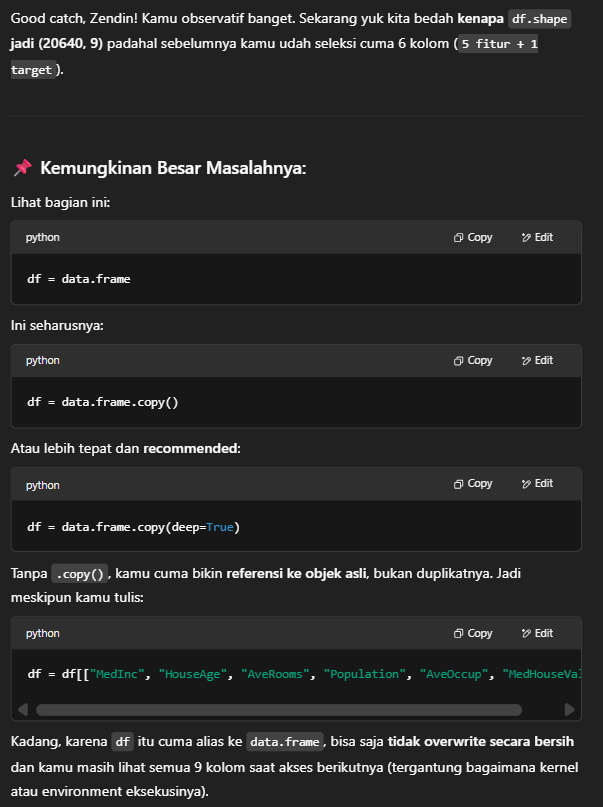

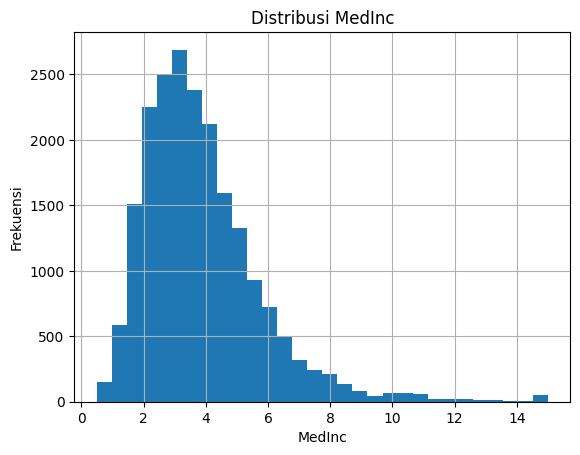

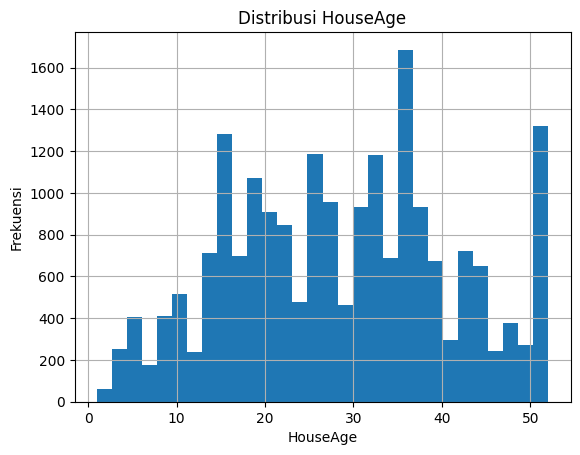

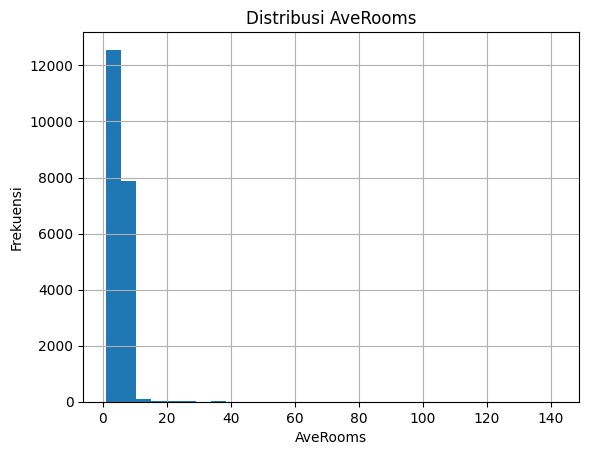

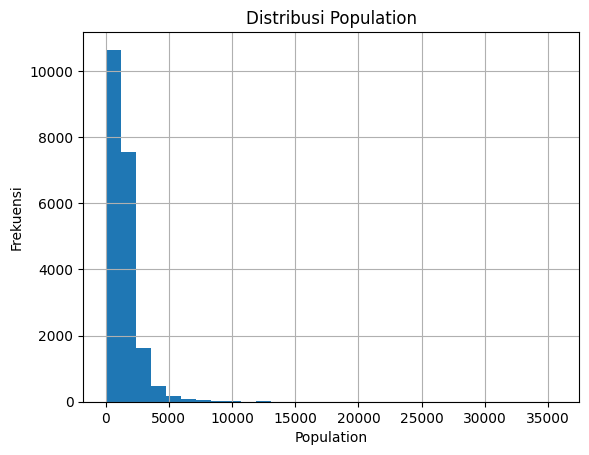

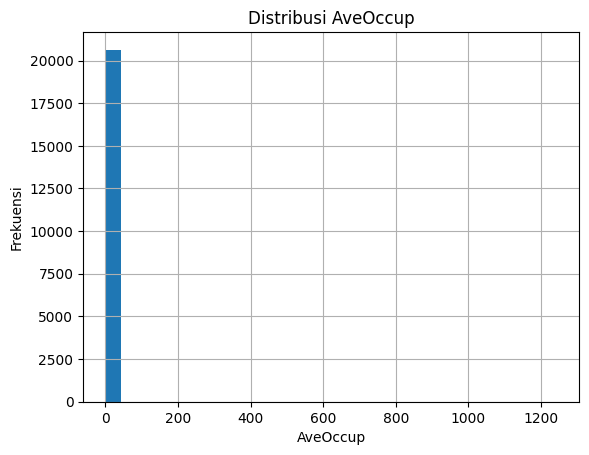

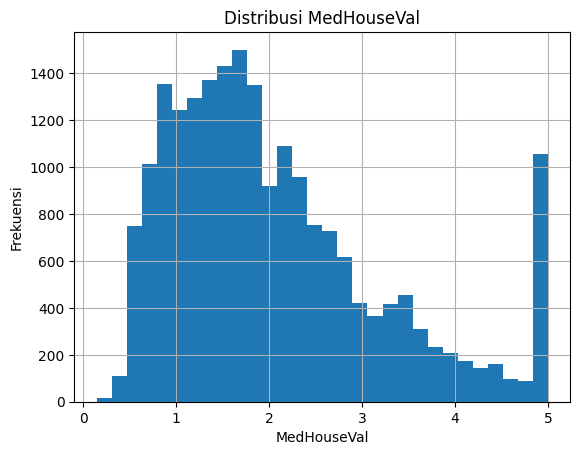

In [45]:
# 4. Plot distribusi tiap kolom
import matplotlib.pyplot as plt
for col in df.columns:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

## EDA Ringkas

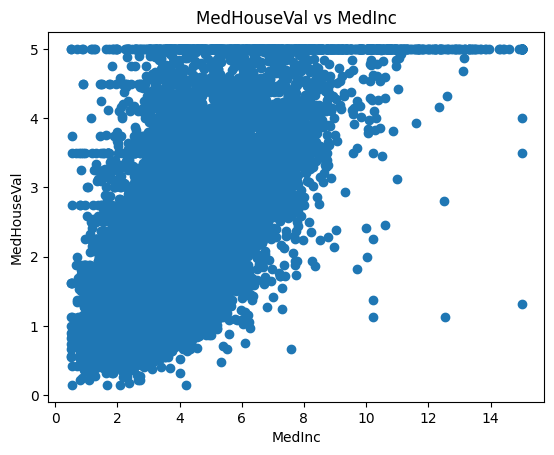

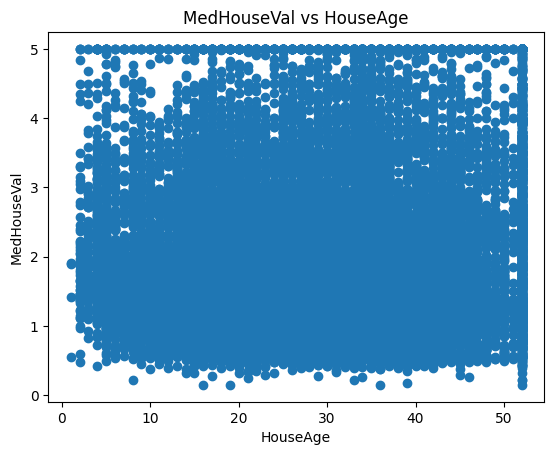

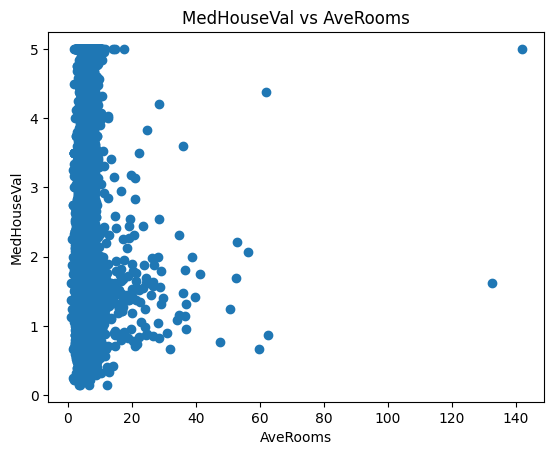

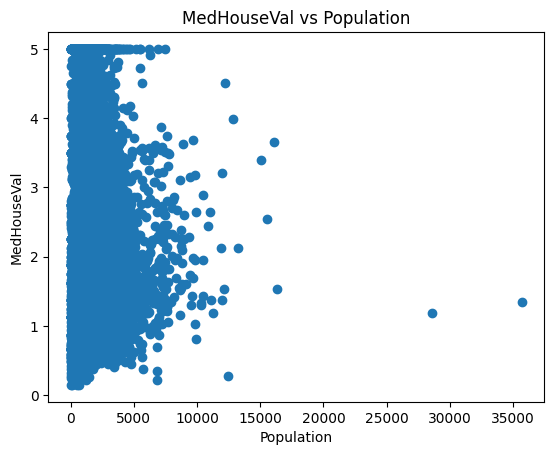

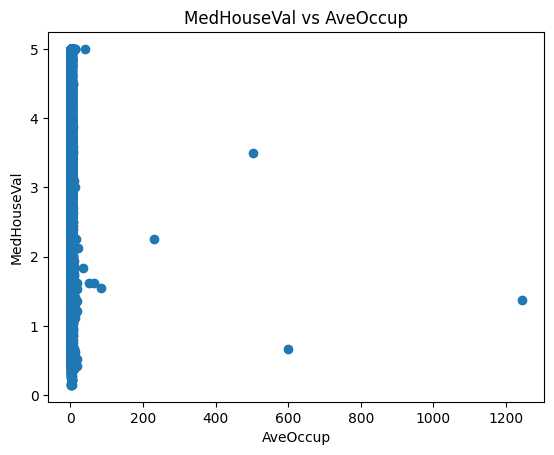

In [46]:
for col in ["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup"]: 
    plt.figure()
    plt.scatter(df[col], df["MedHouseVal"])
    plt.title(f"MedHouseVal vs {col}")
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.show()

In [47]:
# 4.1. banyak nilai unik tiap kolom
df.nunique()


MedInc         12928
HouseAge          52
AveRooms       19392
Population      3888
AveOccup       18841
MedHouseVal     3842
dtype: int64

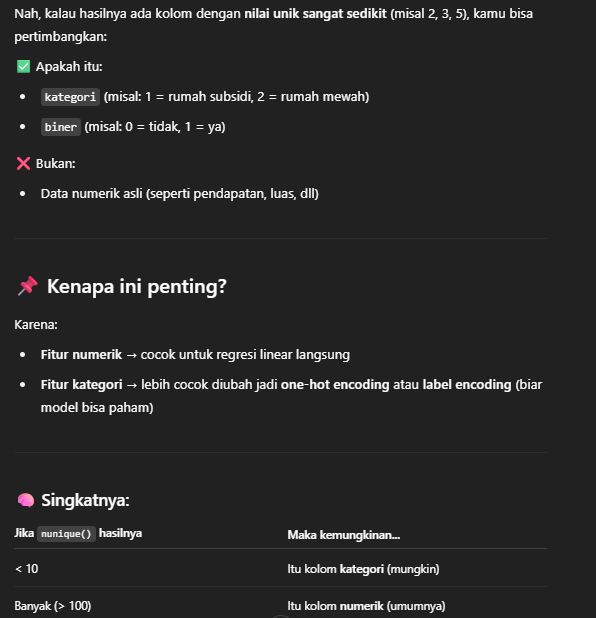

### Korelasi 

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
MedInc,1.00,-0.12,0.33,0.00,0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.30,0.01,0.11
AveRooms,0.33,-0.15,1.00,-0.07,-0.00,0.15
Population,0.00,-0.30,-0.07,1.00,0.07,-0.02
AveOccup,0.02,0.01,-0.00,0.07,1.00,-0.02
MedHouseVal,0.69,0.11,0.15,-0.02,-0.02,1.00


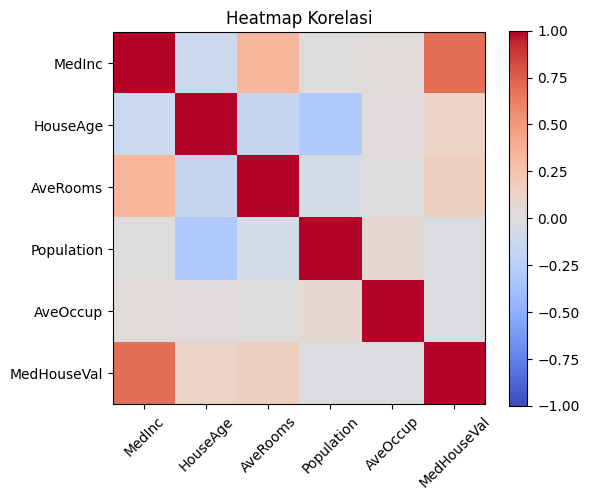

In [48]:
# 5.1. Matriks korelasi
corr = df.corr().round(2)
display(corr)

# 5.2. Heatmap sederhana (opsional)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Heatmap Korelasi")
plt.tight_layout()
plt.show()


> Kalau dilihat disini sih menurut berarti yang berhubungan dengan target itu adalah : `MedInc`

> Sebaliknya kalau yang tidak ada hubungan ( 0 ) itu adalah ( ambil satu aja ) : `Population`

## Kasus 1 : Model dengan variabel paling ngaruh dengan target 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Split
x_train, x_test, y_train, y_test = train_test_split(
    df[["MedInc"]],
    df["MedHouseVal"],
    test_size=0.2,
    random_state=42
)

# Fit 
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluasi 
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print("Koefisien model:", dict(zip(
    ["MedInc"],
    model.coef_
)))

RMSE: 0.84
Koefisien model: {'MedInc': np.float64(0.4193384939381274)}


In [56]:
print("="*40)
print("📊 Evaluasi Model Linear Regression")
print("="*40)
print(f"🔍 RMSE (Root Mean Squared Error): {rmse:.2f}\n")

print("📈 Koefisien (Pengaruh MedInc terhadap MedHouseVal ):")
for feature, coef in zip(["MedInc"], model.coef_):
    print(f"- {feature:<12}: {coef:>8.2f}")

print("="*40)

📊 Evaluasi Model Linear Regression
🔍 RMSE (Root Mean Squared Error): 1.14

📈 Koefisien (Pengaruh MedInc terhadap MedHouseVal ):
- MedInc      :    -0.00


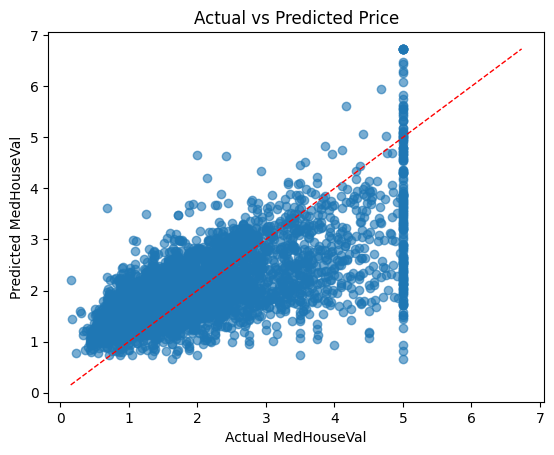

In [51]:
import matplotlib.pyplot as plt 
import numpy as np

# 1. Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
# garis y=x untuk acuan
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted Price")
plt.show()


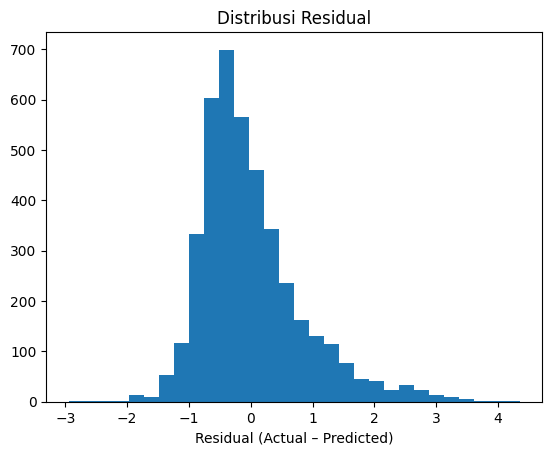

In [52]:
# 2. Residual Distribution
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual – Predicted)")
plt.title("Distribusi Residual")
plt.show()

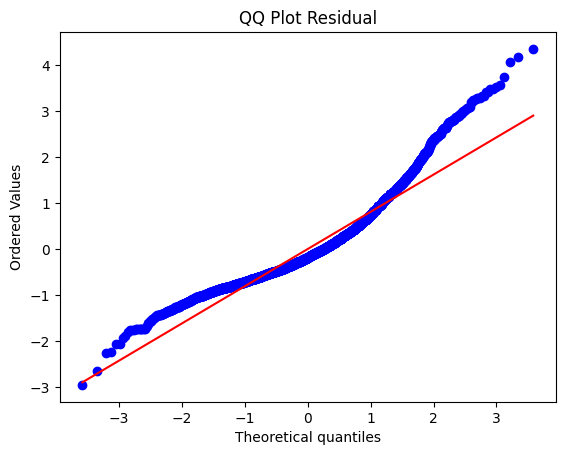

In [53]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot Residual")
plt.show()


## Kasus 2 : Model dengan variabel paling tidak ngaruh dengan target

📊 RMSE: 1.14
📈 Koefisien (Pengaruh Population): -0.000026


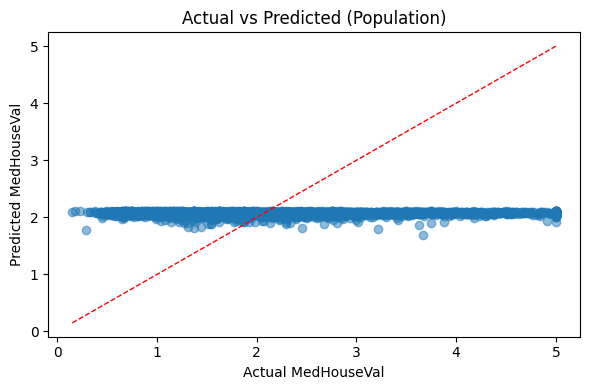

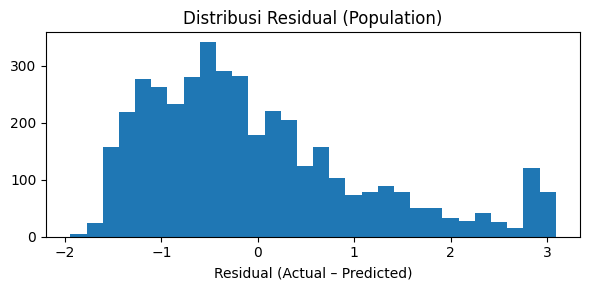

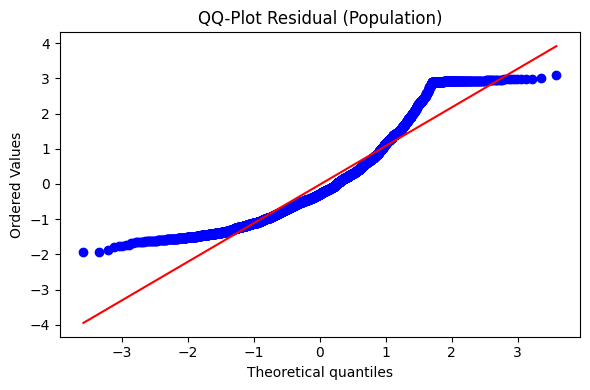

In [55]:
# 1. Import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats

# 2. Siapkan X dan y
#   Misal df sudah berisi kolom ["Population", "MedHouseVal"] seperti sebelumnya
X = df[["Population"]]
y = df["MedHouseVal"]

# 3. Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Buat dan fit model
model = LinearRegression()
model.fit(x_train, y_train)

# 5. Predict dan hitung RMSE
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
coef = model.coef_[0]

print(f"📊 RMSE: {rmse:.2f}")
print(f"📈 Koefisien (Pengaruh Population): {coef:.6f}")

# 6. Visualisasi Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted (Population)")
plt.tight_layout()
plt.show()

# 7. Analisis Residual
residuals = y_test - y_pred

# 7a. Histogram residual
plt.figure(figsize=(6,3))
plt.hist(residuals, bins=30)
plt.title("Distribusi Residual (Population)")
plt.xlabel("Residual (Actual – Predicted)")
plt.tight_layout()
plt.show()

# 7b. QQ-plot residual
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot Residual (Population)")
plt.tight_layout()
plt.show()


📊 Evaluasi Model Linear Regression (Semua Fitur)
   • RMSE : 0.81 ribu
   • R²   : 0.499
📈 Koefisien per fitur:
   - MedInc    :  0.445 (kenaikan 1 unit → Δ MedHouseVal 0.445 ribu)
   - HouseAge  :  0.018 (kenaikan 1 unit → Δ MedHouseVal 0.018 ribu)
   - AveRooms  : -0.027 (kenaikan 1 unit → Δ MedHouseVal -0.027 ribu)
   - Population:  0.000 (kenaikan 1 unit → Δ MedHouseVal 0.000 ribu)
   - AveOccup  : -0.004 (kenaikan 1 unit → Δ MedHouseVal -0.004 ribu)


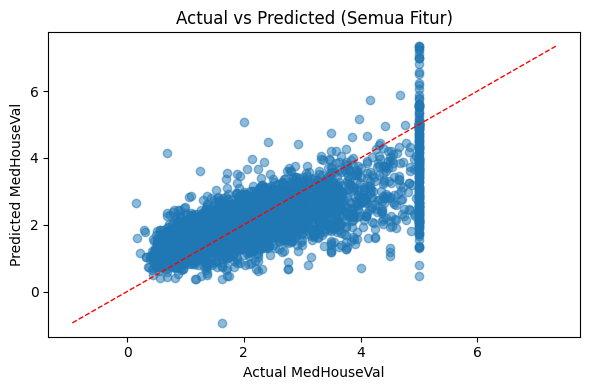

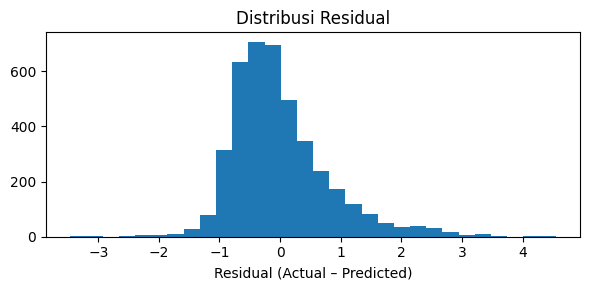

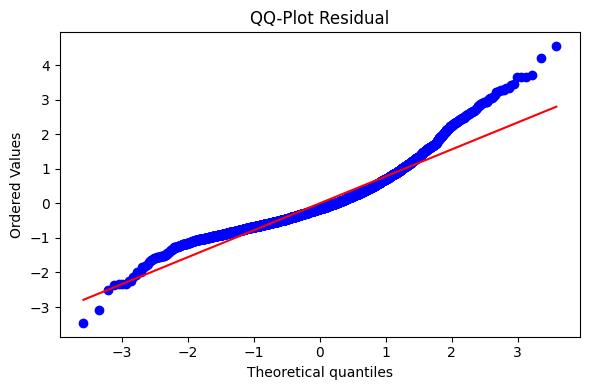

In [58]:
# 1. Import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats

# 2. Siapkan X dan y
features = ["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup"]
X = df[features]
y = df["MedHouseVal"]

# 3. Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Buat dan fit model
model = LinearRegression()
model.fit(x_train, y_train)

# 5. Predict dan hitung metrik
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
coefs = dict(zip(features, model.coef_))

print("📊 Evaluasi Model Linear Regression (Semua Fitur)")
print(f"   • RMSE : {rmse:.2f} ribu")
print(f"   • R²   : {r2:.3f}")
print("📈 Koefisien per fitur:")
for feat, coef in coefs.items():
    print(f"   - {feat:<10}: {coef:>6.3f} (kenaikan 1 unit → Δ MedHouseVal {coef:.3f} ribu)")

# 6. Visualisasi Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted (Semua Fitur)")
plt.tight_layout()
plt.show()

# 7. Distribusi dan QQ-plot Residual
residuals = y_test - y_pred

# 7a. Histogram residual
plt.figure(figsize=(6,3))
plt.hist(residuals, bins=30)
plt.title("Distribusi Residual")
plt.xlabel("Residual (Actual – Predicted)")
plt.tight_layout()
plt.show()

# 7b. QQ-plot residual
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot Residual")
plt.tight_layout()
plt.show()


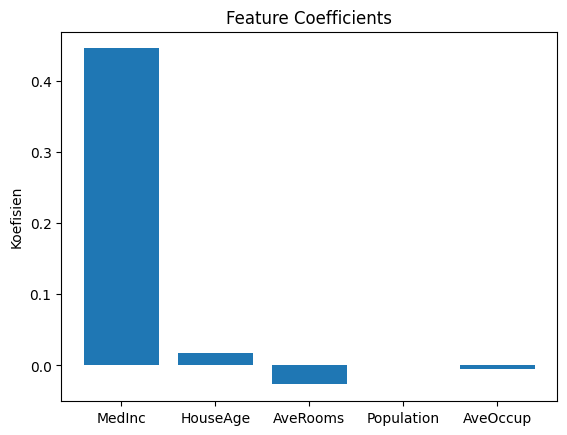

In [59]:
# Koefisien Model (Bar Chart)
features = ["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup"]
coefs = model.coef_
plt.figure()
plt.bar(features, coefs)
plt.ylabel("Koefisien")
plt.title("Feature Coefficients")
plt.show()